# Statistical Arbitrage by Pairs Trading

In [4]:
import sys
print(sys.version)

3.8.2 (default, Dec 21 2020, 15:06:04) 
[Clang 12.0.0 (clang-1200.0.32.29)]


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
from matplotlib.ticker import FuncFormatter
from datetime import date
from pandas_datareader import data as pdr

In [2]:
tickers = ['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','NVDA','TSLA','JPM','JNJ','V','UNH','PYPL','HD','PG','MA','DIS','BAC','ADBE','XOM','CMCSA','NFLX','VZ','INTC']
thelen = len(tickers)

thelen = len(tickers)
price_data = []

for ticker in range(thelen):
    prices = dr.DataReader(tickers[ticker], start = '2011-01-01', end='2021-08-20', data_source='yahoo')
    price_data.append(prices.assign(ticker=ticker)[['Adj Close']])
df_stocks = pd.concat(price_data, axis = 1)
df_stocks.columns = tickers
df_stocks

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,NVDA,TSLA,JPM,JNJ,...,PG,MA,DIS,BAC,ADBE,XOM,CMCSA,NFLX,VZ,INTC
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,9.891260,22.046198,180.000000,NaN,297.282288,295.875977,3.537707,5.326000,31.703350,45.550339,...,46.358402,21.178066,33.029694,11.602729,30.780001,48.056816,8.987330,25.100000,21.913332,15.239765
2011-01-03,10.106220,22.101492,184.220001,NaN,302.477478,301.046600,3.634190,5.324000,32.570312,46.264698,...,46.675484,20.870008,33.302662,12.342030,31.290001,48.996658,9.190701,25.487143,22.311430,15.109324
2011-01-04,10.158968,22.188383,185.009995,NaN,301.361359,299.935760,3.622703,5.334000,33.041683,46.655025,...,46.805187,21.139320,34.332928,12.385518,31.510000,49.226700,9.219460,25.910000,22.758516,15.326727
2011-01-05,10.242065,22.117289,187.419998,NaN,304.839844,303.397797,3.900666,5.366000,33.445736,46.625572,...,46.697098,21.762070,35.187054,12.611658,32.220001,49.095238,9.342715,25.675714,23.070860,15.174542
2011-01-06,10.233788,22.765007,185.860001,NaN,307.057068,305.604523,4.440510,5.576000,33.281132,46.551922,...,46.617825,21.854738,34.914082,12.559474,32.270000,49.410725,9.350934,25.427143,22.480158,15.051352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-16,151.119995,294.037109,3298.989990,366.559998,2766.189941,2778.320068,199.500000,686.169983,158.929993,177.839996,...,144.639999,363.559998,179.089996,41.290001,636.940002,55.939999,59.250000,517.919983,55.980000,53.470001
2021-08-17,150.190002,292.519989,3241.959961,358.450012,2733.229980,2746.010010,194.580002,665.710022,157.009995,179.470001,...,144.880005,363.230011,175.830002,41.090000,635.010010,55.560001,59.470001,518.909973,56.180000,52.689999
2021-08-18,146.360001,290.730011,3201.219971,355.450012,2708.979980,2731.399902,190.399994,688.989990,155.580002,177.190002,...,143.300003,360.950012,174.740005,40.790001,626.770020,54.389999,59.029999,521.869995,55.470001,52.189999


In [3]:
df_stocks = df_stocks.dropna()
df_stocks

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,NVDA,TSLA,JPM,JNJ,...,PG,MA,DIS,BAC,ADBE,XOM,CMCSA,NFLX,VZ,INTC
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06,28.793232,39.712734,436.040009,87.550003,545.619995,522.859985,4.891751,55.944000,56.993282,83.487633,...,66.485268,90.920395,108.461121,15.121383,80.500000,61.102272,27.689619,94.571426,35.575630,25.384565
2015-07-07,28.722391,39.632221,436.720001,87.220001,550.030029,525.020020,4.799592,53.576000,56.544655,84.099770,...,67.872299,90.467529,109.773529,14.898222,80.589996,61.353981,27.867947,94.091431,35.734451,25.266264
2015-07-08,28.009413,39.578548,429.700012,85.650002,541.700012,516.830017,4.765638,50.992001,55.384998,83.122078,...,67.265999,89.118546,107.983025,14.505460,79.989998,60.687656,27.502373,93.507141,35.642620,24.928249
2015-07-09,27.438124,39.829041,434.390015,85.879997,544.650024,520.679993,4.707432,51.584000,55.960602,83.657692,...,66.991920,89.648514,108.367363,14.710765,80.470001,60.413727,27.645037,95.727142,35.397755,24.446589
2015-07-10,28.171667,39.909554,443.510010,87.949997,556.109985,530.130005,4.789890,51.830002,56.756275,84.618378,...,67.232780,91.170921,109.154816,14.907151,80.589996,60.872742,28.171103,97.228569,35.964008,24.649393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-16,151.119995,294.037109,3298.989990,366.559998,2766.189941,2778.320068,199.500000,686.169983,158.929993,177.839996,...,144.639999,363.559998,179.089996,41.290001,636.940002,55.939999,59.250000,517.919983,55.980000,53.470001
2021-08-17,150.190002,292.519989,3241.959961,358.450012,2733.229980,2746.010010,194.580002,665.710022,157.009995,179.470001,...,144.880005,363.230011,175.830002,41.090000,635.010010,55.560001,59.470001,518.909973,56.180000,52.689999
2021-08-18,146.360001,290.730011,3201.219971,355.450012,2708.979980,2731.399902,190.399994,688.989990,155.580002,177.190002,...,143.300003,360.950012,174.740005,40.790001,626.770020,54.389999,59.029999,521.869995,55.470001,52.189999


In [5]:
#test train split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train, test = train_test_split(df_stocks, test_size = 0.5, shuffle = False)

In [7]:
train, test

(                 AAPL        MSFT         AMZN          FB        GOOGL  \
 Date                                                                      
 2015-07-06  28.793232   39.712734   436.040009   87.550003   545.619995   
 2015-07-07  28.722391   39.632221   436.720001   87.220001   550.030029   
 2015-07-08  28.009413   39.578548   429.700012   85.650002   541.700012   
 2015-07-09  27.438124   39.829041   434.390015   85.879997   544.650024   
 2015-07-10  28.171667   39.909554   443.510010   87.949997   556.109985   
 ...               ...         ...          ...         ...          ...   
 2018-07-20  46.205383  102.114632  1813.699951  209.940002  1197.880005   
 2018-07-23  46.246410  103.748169  1802.000000  210.910004  1211.000000   
 2018-07-24  46.581894  103.450287  1829.239990  214.669998  1258.150024   
 2018-07-25  47.021164  106.496346  1863.609985  217.500000  1275.939941   
 2018-07-26  46.873936  105.333656  1808.000000  176.259995  1285.500000   
 
          

Text(0.5,1,'Asset Correlation Matrix')

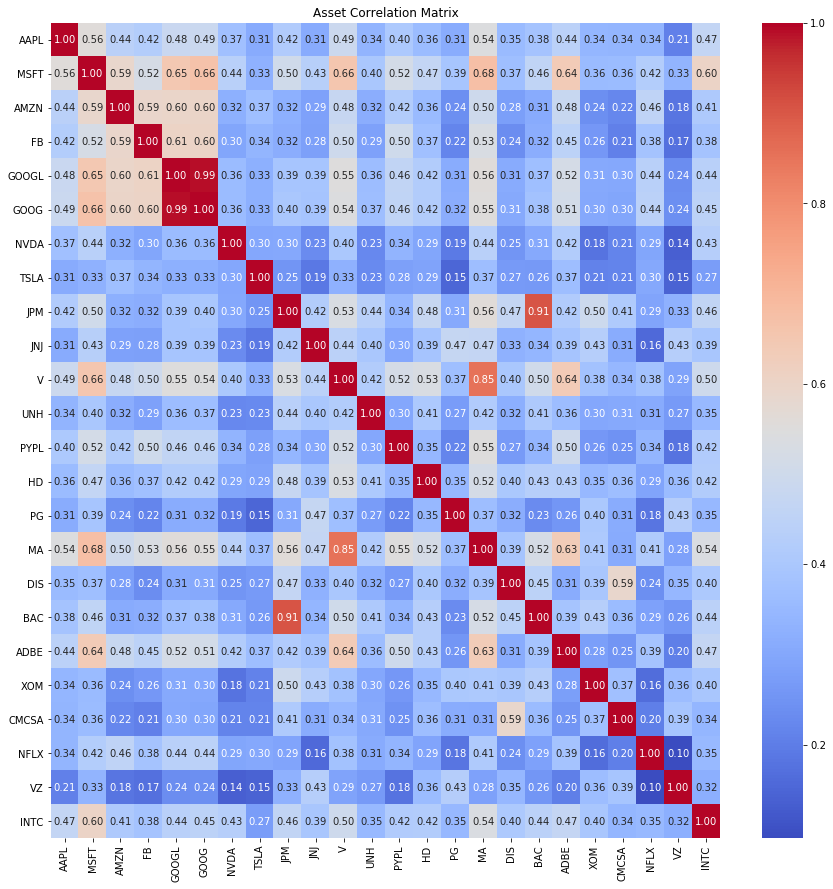

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.pct_change().corr(method = 'pearson'), ax = ax, cmap = 'coolwarm', annot=True, fmt =".2f")
ax.set_title('Asset Correlation Matrix')

In [9]:
def findCointegratedPairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1,n):
            result = coint(data[keys[i]], data[keys[j]])
            #print()
            #print(i,j)
            #print()
            pvalue_matrix[i, j] =result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    #print(n)
    return pvalue_matrix, pairs

pvalues, pairs = findCointegratedPairs(train)
print(pairs)

[('AAPL', 'GOOGL'), ('AAPL', 'GOOG'), ('AAPL', 'HD'), ('MSFT', 'GOOGL'), ('MSFT', 'GOOG'), ('AMZN', 'ADBE'), ('FB', 'NVDA'), ('FB', 'UNH'), ('GOOGL', 'GOOG'), ('GOOGL', 'NVDA'), ('GOOGL', 'JPM'), ('GOOGL', 'V'), ('GOOGL', 'UNH'), ('GOOGL', 'PYPL'), ('GOOGL', 'HD'), ('GOOGL', 'MA'), ('GOOGL', 'ADBE'), ('GOOG', 'NVDA'), ('GOOG', 'JPM'), ('GOOG', 'V'), ('GOOG', 'UNH'), ('GOOG', 'PYPL'), ('GOOG', 'HD'), ('GOOG', 'MA'), ('GOOG', 'ADBE'), ('NVDA', 'JPM'), ('NVDA', 'UNH'), ('V', 'MA'), ('V', 'ADBE'), ('UNH', 'HD'), ('PYPL', 'HD'), ('MA', 'ADBE'), ('XOM', 'VZ')]


In [ ]:
pvalues #collapsed

array([[1.00000000e+00, 1.38785011e-01, 3.54784110e-01, 8.16263075e-02,
        1.48097935e-03, 2.74463662e-03, 1.12221402e-01, 4.02517163e-01,
        1.22222687e-01, 8.71581950e-01, 1.06973775e-01, 5.88674470e-02,
        2.41544366e-01, 4.16712256e-02, 9.88335032e-01, 5.65701592e-01,
        9.11597003e-01, 1.53272791e-01, 3.20766578e-01, 9.85595032e-01,
        9.61985155e-01, 7.01277431e-01, 9.28179238e-01, 5.12951197e-01],
       [1.00000000e+00, 1.00000000e+00, 4.53806084e-01, 4.99498885e-01,
        2.39224729e-03, 3.70110918e-03, 1.31722979e-01, 7.59510543e-01,
        8.75413861e-01, 9.83355778e-01, 1.30963263e-01, 2.37796817e-01,
        2.93352106e-01, 2.75741533e-02, 9.93757208e-01, 2.46797907e-01,
        9.64998985e-01, 9.11702765e-01, 6.63554369e-02, 9.82599726e-01,
        9.87002735e-01, 6.00239803e-01, 8.84045733e-01, 1.89368035e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.70826094e-01,
        2.22234002e-01, 2.76715150e-01, 9.61058300e-01, 9.3939

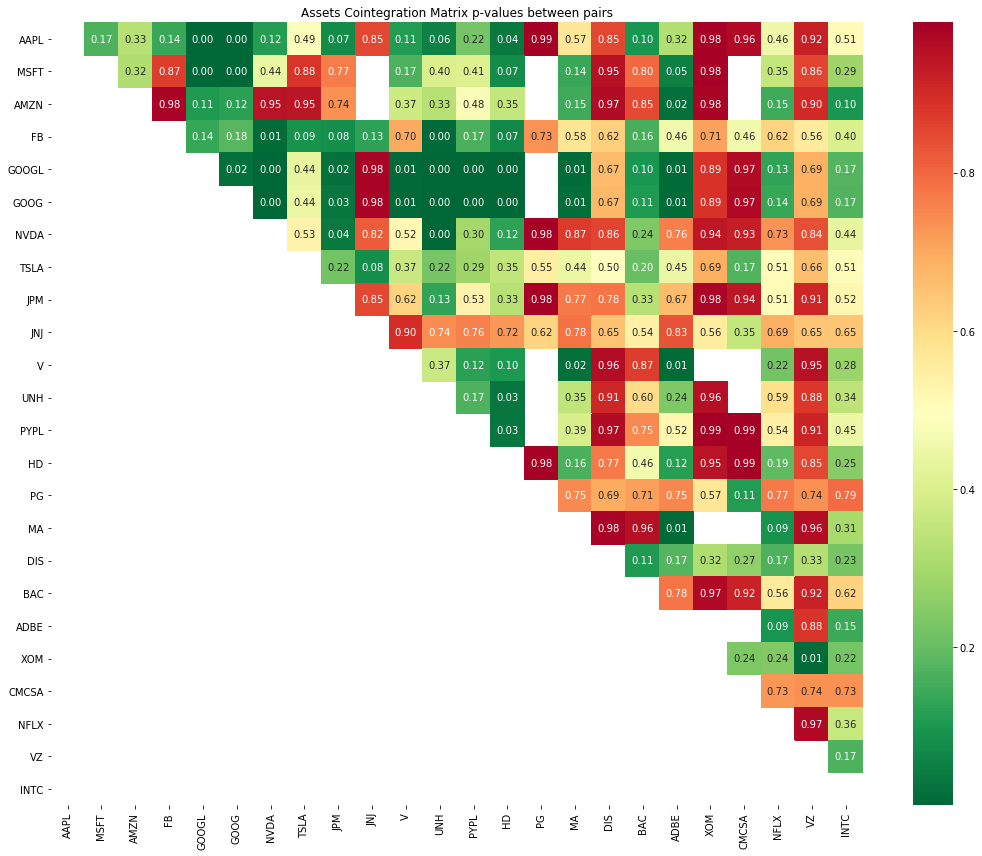

In [10]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(pvalues, xticklabels = train.columns, yticklabels = train.columns, cmap = 'RdYlGn_r', annot = True, fmt = ".2f", mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values between pairs')
plt.tight_layout()


# Stationary test for selected pair

strategy will not work well if the prices are moving exactly together. test for stationarity of time series using AD-Fuller test. it is imp that the spread is stationary: i.e. mean and variance are constant.

1. First calculate the hedge ratio using OLS regression
2. using hedge ratio, calculate spread
3. run AD-Fuller test

Text(0,0.5,'Closing Price')

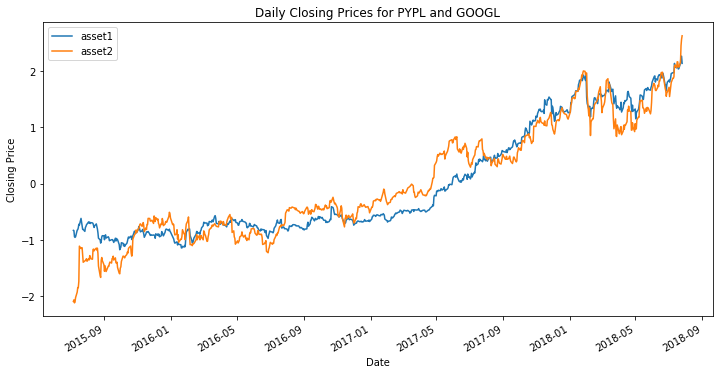

In [11]:
# choose PYPL and GOOGL

asset1 = 'PYPL'
asset2 = 'GOOGL'

train2 = pd.DataFrame()
train2['asset1'] = (train[asset1]-train[asset1].mean())/train[asset1].std() 
train2['asset2'] = (train[asset2]-train[asset2].mean())/train[asset2].std() #normalise prices to see correlation clearly on the same scale

ax = train2[['asset1','asset2']].plot(figsize=(12,6), title = 'Daily Closing Prices for {} and {}'.format(asset1, asset2))
ax.set_ylabel("Closing Price")

Text(0.01,0.05,'                                 OLS Regression Results                                \n=======================================================================================\nDep. Variable:                 asset1   R-squared (uncentered):                   0.905\nModel:                            OLS   Adj. R-squared (uncentered):              0.905\nMethod:                 Least Squares   F-statistic:                              7337.\nDate:                Mon, 23 Aug 2021   Prob (F-statistic):                        0.00\nTime:                        00:22:47   Log-Likelihood:                         -186.71\nNo. Observations:                 772   AIC:                                      375.4\nDf Residuals:                     771   BIC:                                      380.1\nDf Model:                           1                                                  \nCovariance Type:            nonrobust                                                  \n=====

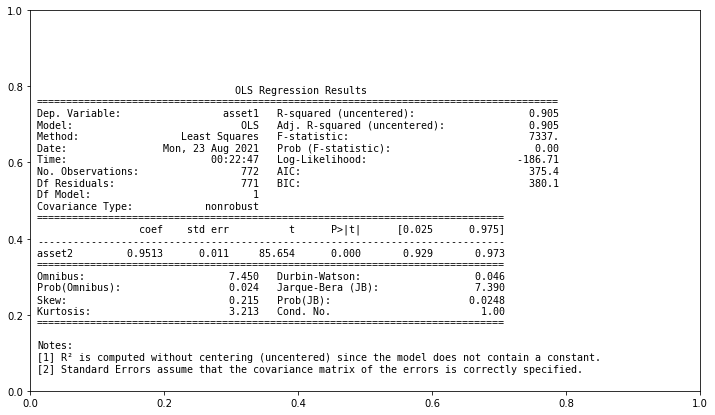

In [13]:
model = sm.OLS(train2.asset1, train2.asset2).fit()
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')

In [14]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.951264285407954


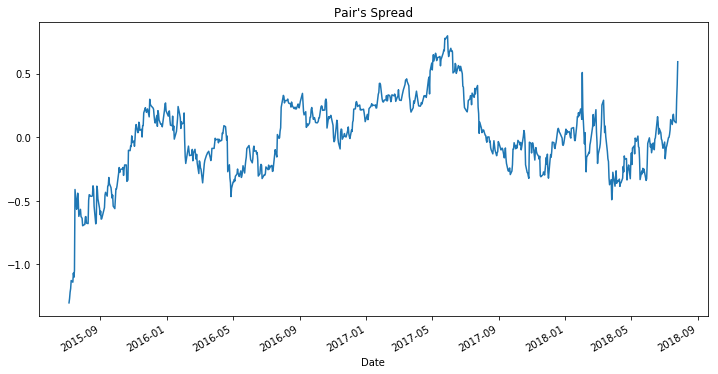

In [19]:
spread = train2.asset2 - model.params[0] * train2.asset1
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")

In [23]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(spread, maxlag = 1)
print("critical value", adf[0])
print(adf[4])

critical value -4.293983749449477
{'1%': -3.4388599939707056, '5%': -2.865295977855759, '10%': -2.5687700561872413}


In [24]:
# reject null, series is stationarity

In [25]:
def z_score(series):
    return (series - series.mean())/series.std()


In [33]:
signals = pd.DataFrame()
signals['asset1'] = test[asset1]
signals['asset2'] = test[asset2]
ratios = signals.asset1 / signals.asset2

signals['z'] = z_score(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [34]:
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z']>signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1,1], default = 0)

In [59]:
signals['positions1'] = signals['signals1'].diff() #take first order difference to get position in the stock
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

print(signals)

                asset1       asset2         z  z upper limit  z lower limit  \
Date                                                                          
2018-07-27   85.459999  1252.890015 -1.573785       0.999353      -0.999353   
2018-07-30   82.389999  1230.040039 -1.636385       0.999353      -0.999353   
2018-07-31   82.139999  1227.219971 -1.638922       0.999353      -0.999353   
2018-08-01   83.459999  1232.989990 -1.600338       0.999353      -0.999353   
2018-08-02   85.529999  1241.130005 -1.537984       0.999353      -0.999353   
...                ...          ...       ...            ...            ...   
2021-08-16  278.279999  2766.189941  0.076394       0.999353      -0.999353   
2021-08-17  271.100006  2733.229980  0.004366       0.999353      -0.999353   
2021-08-18  268.839996  2708.979980  0.007098       0.999353      -0.999353   
2021-08-19  270.579987  2713.600098  0.031158       0.999353      -0.999353   
2021-08-20  272.959991  2748.590088  0.010603       

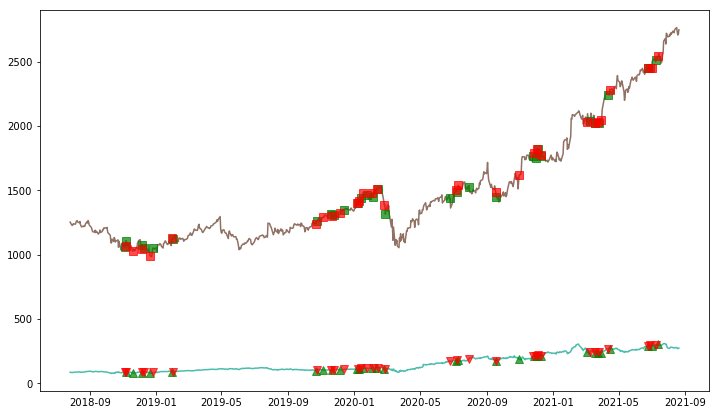

In [66]:
import matplotlib.pyplot as plt

l1, = plt.plot(signals['asset1'], c='#4abdac')
l2, = plt.plot(signals['asset2'], c='#907163')

u1, = plt.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)
u2, = plt.plot(signals['asset1'][signals['positions1'] == -1], lw=0, marker='v', markersize=8, c='r',alpha=0.7)

u3, = plt.plot(signals['asset2'][signals['positions2'] == 1], lw=0, marker='s', markersize=8, c='g',alpha=0.7)
u2, = plt.plot(signals['asset2'][signals['positions2'] == -1], lw=0, marker='s', markersize=8, c='r',alpha=0.7)